# Identifying Fraud at Enron

In this project I will flag individuals at Enron who look like they should be persons of interest in the Federal fraud investigation that resulted when the company went bankrupt

In [1]:
import pandas as pd
import numpy as np
import sys
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read in dataset from pickle, put it in a pandas dataframe, since the data comes in as a dictionary, transform the row the into columns. Since 'NaN' was imported as a string instead of a missing value. We will need to convert these to NaN type by saving it to a a new csv and reloading it to accomindate real 'NaN' values. If we do not deal with this 'NaN' we cannot perform many pandas methods, like describe or info, since all the columns are flawed.

In [2]:
enron = pd.read_pickle('ud120-projects/final_project/final_project_dataset.pkl')
enron = pd.DataFrame(enron)
enron = enron.T

In [3]:
enron.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


With an initial inspection of the data we have a negitive number in the 'deferral_payments' column and a negitive in the 'restricted_stock' column. So it looks like there was just some entry error and some input was added in incorrectly, so we can go in a change and do some manual labor and change that.

In [4]:
enron.ix[[enron.deferral_payments.argmin(), enron.restricted_stock.argmin()]]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BHATNAGAR SANJAY,NaN,NaN,NaN,137864,sanjay.bhatnagar@enron.com,2604490,NaN,29,0,1,...,NaN,137864,False,-2604490,15456290,NaN,463,523,15456290,NaN


In [5]:
BELFER_ROBERT = {'bonus': 'NaN',
              'deferral_payments': 'NaN',
              'deferred_income': -102500,
              'director_fees': 102500,
              'email_address': 'NaN',
              'exercised_stock_options': 'NaN',
              'expenses': 3285,
              'from_messages': 'NaN',
              'from_poi_to_this_person': 'NaN',
              'from_this_person_to_poi': 'NaN',
              'loan_advances': 'NaN',
              'long_term_incentive': 'NaN',
              'other': 'NaN',
              'poi': False,
              'restricted_stock': -44093,
              'restricted_stock_deferred': 44093,
              'salary': 'NaN',
              'shared_receipt_with_poi': 'NaN',
              'to_messages': 'NaN',
              'total_payments': 3285,
              'total_stock_value': 'NaN'}

BHATNAGAR_SANJAY = {'bonus': 'NaN',
                 'deferral_payments': 'NaN',
                 'deferred_income': 'NaN',
                 'director_fees': 'NaN',
                 'email_address': 'sanjay.bhatnagar@enron.com',
                 'exercised_stock_options': 15456290,
                 'expenses': 137864,
                 'from_messages': 29,
                 'from_poi_to_this_person': 0,
                 'from_this_person_to_poi': 1,
                 'loan_advances': 'NaN',
                 'long_term_incentive': 'NaN',
                 'other': 'NaN',
                 'poi': False,
                 'restricted_stock': 2604490,
                 'restricted_stock_deferred': -2604490,
                 'salary': 'NaN',
                 'shared_receipt_with_poi': 463,
                 'to_messages': 523,
                 'total_payments': 137864,
                 'total_stock_value': 15456290} 

enron.ix['BELFER ROBERT'] = BELFER_ROBERT
enron.ix['BHATNAGAR SANJAY'] = BHATNAGAR_SANJAY

Now we can write our fixed data frame to a csv

In [6]:
enron.to_csv('enron_data.csv')

Reread the data in and to set the NaN values correctly 

In [7]:
enron = pd.read_csv('enron_data.csv', na_values=['NaN'], index_col=0)

In [8]:
enron.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


## Describing Data

With doing some initial checking we can see that some of the numbers are a bit strange and the standard deviations on some of these columns are extremely high and we have a huge max compared to the 75th percentile of the data. So lets explore this furthur and check for outliers.

In [9]:
enron.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,82.000000,38.000000,50.000000,16.000000,1.010000e+02,97.000000,86.000000,86.000000,86.000000,4.0000,66.000000,92.000000,146,1.110000e+02,18.000000,95.000000,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2374234.609756,1688599.789474,-1119715.640000,174814.625000,6.173545e+06,107942.226804,608.790698,64.895349,41.232558,41962500.0000,1470361.454545,927556.282609,0.1232877,2.347355e+06,-836966.111111,562194.294737,1176.465116,2073.860465,4.958185e+06,6.896976e+06
std,10713327.969046,5223139.831609,3986822.368065,327904.510505,3.122316e+07,528065.362911,1841.033949,86.979244,100.073111,47083208.7019,5942759.315498,4613665.057184,0.3298989,1.245444e+07,1812848.543844,2716369.154553,1178.317641,2582.700981,2.905005e+07,3.896054e+07
min,70000.000000,7961.000000,-27992891.000000,17500.000000,9.803000e+03,148.000000,12.000000,0.000000,0.000000,400000.0000,69223.000000,2.000000,False,-4.409300e+04,-7576788.000000,477.000000,2.000000,57.000000,1.480000e+02,2.879800e+04
25%,431250.000000,87468.750000,-666977.750000,100633.500000,5.912500e+05,22344.000000,22.750000,10.000000,1.000000,1600000.0000,281250.000000,1209.000000,0,2.559810e+05,-456814.500000,211816.000000,249.750000,541.250000,3.620960e+05,4.996582e+05
50%,769375.000000,243952.000000,-151927.000000,106164.500000,1.324578e+06,46950.000000,41.000000,35.000000,8.000000,41762500.0000,442035.000000,51984.500000,0,4.623840e+05,-230493.500000,259996.000000,740.500000,1211.000000,1.099100e+06,1.114550e+06
75%,1200000.000000,1066353.750000,-39072.000000,112815.000000,2.549361e+06,81353.000000,145.500000,72.250000,24.750000,82125000.0000,938672.000000,365244.250000,0,1.021248e+06,-85725.500000,312117.000000,1888.250000,2634.750000,2.081796e+06,3.092011e+06
max,97343619.000000,32083396.000000,-833.000000,1398517.000000,3.117640e+08,5235198.000000,14368.000000,528.000000,609.000000,83925000.0000,48521928.000000,42667589.000000,True,1.303223e+08,44093.000000,26704229.000000,5521.000000,15149.000000,3.098866e+08,4.345095e+08


So looking at the max value of one of the columns in the data set, we can see that there is a major outlier, which is the row called 'Total'. Since this row has no use in predicting POIs we can safely drop it.

In [10]:
pd.DataFrame(enron.ix[enron.bonus.argmax()]).T

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,9.734362e+07,3.20834e+07,-2.799289e+07,1398517,NaN,3.11764e+08,5235198,NaN,NaN,NaN,...,4.852193e+07,4.266759e+07,False,1.303223e+08,-7576788,2.670423e+07,NaN,NaN,3.098866e+08,4.345095e+08


In [11]:
enron.drop(['TOTAL'], inplace = True)
enron.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,81.000000,37.000000,49.000000,15.000000,100.000000,96.000000,86.000000,86.000000,86.000000,3.000000,65.000000,91.000000,145,110.000000,17.000000,94.000000,86.000000,86.000000,1.240000e+02,125.000000
mean,1201773.074074,867118.810811,-571283.489796,93234.466667,3117640.000000,54533.312500,608.790698,64.895349,41.232558,27975000.000000,746491.200000,468874.604396,0.1241379,1183946.481818,-440506.000000,284087.542553,1176.465116,2073.860465,2.499085e+06,3476076.088000
std,1441679.438330,1297343.817438,934714.861333,33320.075521,5657923.990781,46712.751852,1841.033949,86.979244,100.073111,46382560.030684,862917.421568,1396987.469699,0.3308818,2217440.392530,696951.742443,177131.115377,1178.317641,2582.700981,9.419345e+06,6614498.776273
min,70000.000000,7961.000000,-3504386.000000,17500.000000,9803.000000,148.000000,12.000000,0.000000,0.000000,400000.000000,69223.000000,2.000000,False,-44093.000000,-2604490.000000,477.000000,2.000000,57.000000,1.480000e+02,28798.000000
25%,425000.000000,85430.000000,-583325.000000,100017.000000,570128.750000,22140.500000,22.750000,10.000000,1.000000,1200000.000000,275000.000000,1203.000000,0,254018.000000,-409554.000000,211802.000000,249.750000,541.250000,3.616470e+05,495633.000000
50%,750000.000000,227449.000000,-144062.000000,103750.000000,1310813.500000,46547.500000,41.000000,35.000000,8.000000,2000000.000000,422158.000000,51587.000000,0,451740.000000,-153686.000000,258741.000000,740.500000,1211.000000,1.095882e+06,1110705.000000
75%,1200000.000000,875307.000000,-38346.000000,110895.000000,2544450.000000,79252.250000,145.500000,72.250000,24.750000,41762500.000000,831809.000000,359083.500000,0,1002369.750000,-82782.000000,308606.500000,1888.250000,2634.750000,2.056144e+06,3064208.000000
max,8000000.000000,6426990.000000,-833.000000,125034.000000,34348384.000000,228763.000000,14368.000000,528.000000,609.000000,81525000.000000,5145434.000000,10359729.000000,True,14761694.000000,44093.000000,1111258.000000,5521.000000,15149.000000,1.035598e+08,49110078.000000


### Exploratory Data Analysis

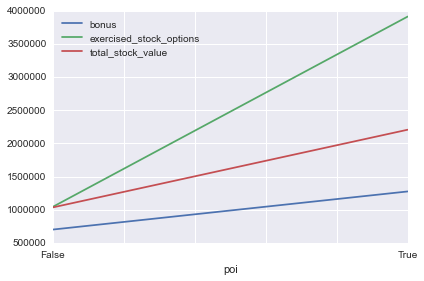

In [12]:
enron.groupby('poi').median()[['bonus', 'exercised_stock_options', 'total_stock_value']].plot()
plt.tight_layout()

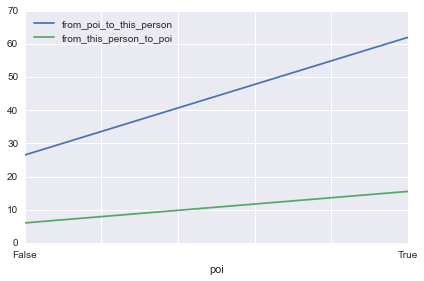

In [13]:
enron.groupby('poi').median()[['from_poi_to_this_person', 'from_this_person_to_poi']].plot()
plt.tight_layout()

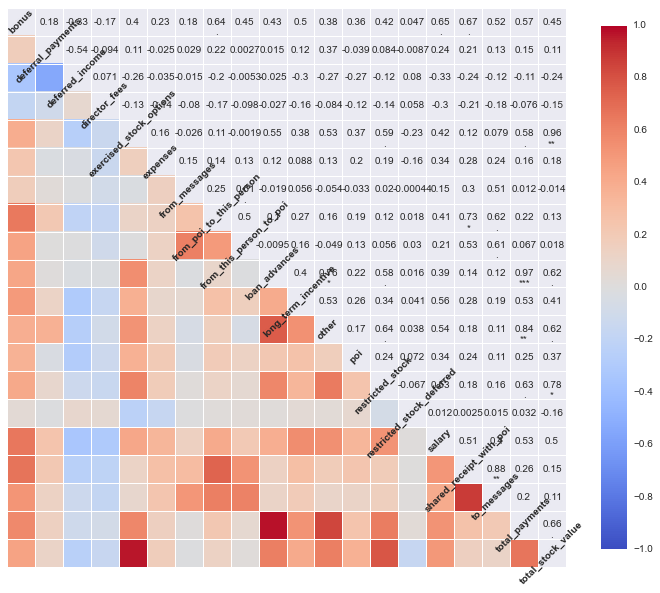

In [14]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.corrplot(enron.fillna(0))
plt.tight_layout()

## Predictions

Get data ready for models, copy data into X, fill all the NaN with 0s, disregard the email_address column, pop out the 'poi' column and store it in y for the dependant variable.

In [15]:
X = enron.copy()
X.fillna(0, inplace = True)
X.pop('email_address')
y = X.pop('poi')
X.shape, y.shape

((145, 19), (145,))

Scale data use a min-max scaler and show the features using a classification scoring function

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest

scaler = MinMaxScaler().fit_transform(X)
selection = SelectKBest(k='all').fit(scaler, y)
scores = pd.DataFrame([X.columns, selection.scores_])
scores = scores.T
scores.columns = ['Featues', 'Score']
scores.sort('Score', ascending=False).reset_index(drop = True)

,Featues,Score
0,total_stock_value,23.05379
1,exercised_stock_options,22.8722
2,bonus,21.32789
3,salary,18.8618
4,deferred_income,11.69896
5,long_term_incentive,10.2229
6,total_payments,9.48407
7,restricted_stock,9.098243
8,shared_receipt_with_poi,8.903822
9,loan_advances,7.301407


### SVC

In [17]:
from sklearn.svm import SVC
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV

params = {
    'kernel' : ['rbf', 'linear'],
    'C': np.logspace(-1, 2, 4),
    'gamma': np.logspace(-4, 0, 5),
}

cv = ShuffleSplit(scaler.shape[0], random_state = 4)
cv2 = StratifiedShuffleSplit(y, random_state = 4) 
clf = GridSearchCV(SVC(), params, cv = cv2).fit(scaler, y)

In [18]:
clf.best_params_, clf.best_score_

({'C': 100.0, 'gamma': 0.10000000000000001, 'kernel': 'rbf'},
 0.90666666666666662)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = clf.predict(scaler)
print confusion_matrix(y, pred)
print classification_report(y, pred)

[[127   0]
 [ 11   7]]
             precision    recall  f1-score   support

      False       0.92      1.00      0.96       127
       True       1.00      0.39      0.56        18

avg / total       0.93      0.92      0.91       145



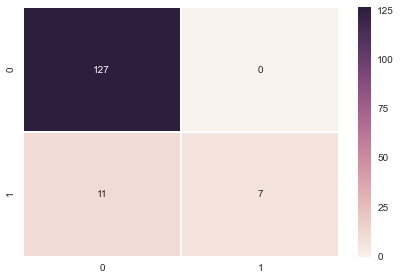

In [20]:
sns.heatmap(confusion_matrix(y, pred), annot = True, fmt = '')
plt.tight_layout()

The misclassifed Person's Of Intrests. What the classifer doesn't locate

In [21]:
SerPred = pd.Series(pred, name='Predictions')
new_y = pd.DataFrame(y).reset_index()
new_y.join(SerPred)
new_y.columns = ['Person', 'True']
comparisons = new_y.join(SerPred)
print len(comparisons[comparisons.True != comparisons.Predictions])
comparisons[comparisons.True != comparisons.Predictions]

11


,Person,True,Predictions
15,BOWEN JR RAYMOND M,True,False
20,CALGER CHRISTOPHER F,True,False
22,CAUSEY RICHARD A,True,False
26,COLWELL WESLEY,True,False
43,FASTOW ANDREW S,True,False
54,GLISAN JR BEN F,True,False
76,KOENIG MARK E,True,False
77,KOPPER MICHAEL J,True,False
113,RIEKER PAULA H,True,False
119,SHELBY REX,True,False


POI's that the predictor gets correct

In [22]:
comparisons[(comparisons.True == True) & (comparisons.Predictions == True)]

,Person,True,Predictions
7,BELDEN TIMOTHY N,True,True
31,DELAINEY DAVID W,True,True
59,HANNON KEVIN P,True,True
65,HIRKO JOSEPH,True,True
79,LAY KENNETH L,True,True
112,RICE KENNETH D,True,True
122,SKILLING JEFFREY K,True,True


Now we can manually go in and look at the columns where we get it wrong. First we look at the misclassifed values.

In [23]:
enron.ix[comparisons[comparisons.True != comparisons.Predictions].Person.values]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BOWEN JR RAYMOND M,1350000,NaN,-833,NaN,raymond.bowen@enron.com,NaN,65907,27,140,15,...,974293,1621,True,252055,NaN,278601,1593,1858,2669589,252055
CALGER CHRISTOPHER F,1250000,NaN,-262500,NaN,christopher.calger@enron.com,NaN,35818,144,199,25,...,375304,486,True,126027,NaN,240189,2188,2598,1639297,126027
CAUSEY RICHARD A,1000000,NaN,-235000,NaN,richard.causey@enron.com,NaN,30674,49,58,12,...,350000,307895,True,2502063,NaN,415189,1585,1892,1868758,2502063
COLWELL WESLEY,1200000,27610,-144062,NaN,wes.colwell@enron.com,NaN,16514,40,240,11,...,NaN,101740,True,698242,NaN,288542,1132,1758,1490344,698242
FASTOW ANDREW S,1300000,NaN,-1386055,NaN,andrew.fastow@enron.com,NaN,55921,NaN,NaN,NaN,...,1736055,277464,True,1794412,NaN,440698,NaN,NaN,2424083,1794412
GLISAN JR BEN F,600000,NaN,NaN,NaN,ben.glisan@enron.com,384728,125978,16,52,6,...,71023,200308,True,393818,NaN,274975,874,873,1272284,778546
KOENIG MARK E,700000,NaN,NaN,NaN,mark.koenig@enron.com,671737,127017,61,53,15,...,300000,150458,True,1248318,NaN,309946,2271,2374,1587421,1920055
KOPPER MICHAEL J,800000,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134,NaN,NaN,NaN,...,602671,907502,True,985032,NaN,224305,NaN,NaN,2652612,985032
RIEKER PAULA H,700000,214678,-100000,NaN,paula.rieker@enron.com,1635238,33271,82,35,48,...,NaN,1950,True,283649,NaN,249201,1258,1328,1099100,1918887
SHELBY REX,200000,NaN,-4167,NaN,rex.shelby@enron.com,1624396,22884,39,13,14,...,NaN,1573324,True,869220,NaN,211844,91,225,2003885,2493616


Next we can look and see if we can identify any trends that helped classify them as pois

In [24]:
enron.ix[comparisons[(comparisons.True == True) & (comparisons.Predictions == True)].Person.values]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
DELAINEY DAVID W,3000000,NaN,NaN,NaN,david.delainey@enron.com,2291113,86174,3069,66,609,...,1294981,1661,True,1323148,NaN,365163,2097,3093,4747979,3614261
HANNON KEVIN P,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065
HIRKO JOSEPH,NaN,10259,NaN,NaN,joe.hirko@enron.com,30766064,77978,NaN,NaN,NaN,...,NaN,2856,True,NaN,NaN,NaN,NaN,NaN,91093,30766064
LAY KENNETH L,7000000,202911,-300000,NaN,kenneth.lay@enron.com,34348384,99832,36,123,16,...,3600000,10359729,True,14761694,NaN,1072321,2411,4273,103559793,49110078
RICE KENNETH D,1750000,NaN,-3504386,NaN,ken.rice@enron.com,19794175,46950,18,42,4,...,1617011,174839,True,2748364,NaN,420636,864,905,505050,22542539
SKILLING JEFFREY K,5600000,NaN,NaN,NaN,jeff.skilling@enron.com,19250000,29336,108,88,30,...,1920000,22122,True,6843672,NaN,1111258,2042,3627,8682716,26093672


In [25]:
enron.ix[comparisons[comparisons.True != comparisons.Predictions].Person.values].describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,10.000000,2.000000,7.000000,0,5.000000,11.000000,8.00000,8.000000,8.000000,0,7.000000,11.000000,11,11.000000,0,11.000000,8.000000,8.00000,11.000000,11.000000
mean,910000.000000,121144.000000,-304659.571429,NaN,2524930.200000,62369.545455,57.25000,98.750000,18.250000,NaN,629906.571429,333699.818182,1,1157185.636364,NaN,281081.181818,1374.000000,1613.25000,1733424.818182,2304881.181818
std,373273.804778,132277.051343,487566.995295,NaN,3281294.930167,42045.447695,40.47486,83.716784,13.155661,NaN,563806.628340,483817.159386,0,1078251.062521,NaN,83755.888645,709.909049,780.43994,698536.827620,3286650.181046
min,200000.000000,27610.000000,-1386055.000000,NaN,384728.000000,16514.000000,16.00000,13.000000,6.000000,NaN,71023.000000,486.000000,True,126027.000000,NaN,158403.000000,91.000000,225.00000,360300.000000,126027.000000
25%,700000.000000,74377.000000,-248750.000000,NaN,671737.000000,31972.500000,36.00000,47.750000,11.750000,NaN,325000.000000,51845.000000,1,338733.500000,NaN,232247.000000,1067.500000,1214.25000,1381314.000000,738394.000000
50%,900000.000000,121144.000000,-144062.000000,NaN,1624396.000000,53947.000000,44.50000,55.500000,14.500000,NaN,375304.000000,150458.000000,1,869220.000000,NaN,274975.000000,1421.500000,1808.00000,1639297.000000,1794412.000000
75%,1237500.000000,167911.000000,-52083.500000,NaN,1635238.000000,92020.500000,66.25000,154.750000,17.500000,NaN,788482.000000,292679.500000,1,1521365.000000,NaN,299244.000000,1741.750000,2012.50000,2213984.000000,2206835.500000
max,1350000.000000,214678.000000,-833.000000,NaN,8308552.000000,127017.000000,144.00000,240.000000,48.000000,NaN,1736055.000000,1573324.000000,True,3576206.000000,NaN,440698.000000,2271.000000,2598.00000,2669589.000000,11884758.000000


In [26]:
enron.ix[comparisons[(comparisons.True == True) & (comparisons.Predictions == True)].Person.values].describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.000000,3.000000,4.000000,0,7.000000,7.000000,6.000000,6.00000,6.000000,1,5.000000,7.000000,7,6.00000,0,6.000000,6.000000,6.000000,7.000000e+00,7.000000
mean,4016666.500000,785727.666667,-2313957.750000,NaN,16134410.428571,55952.000000,624.500000,96.50000,131.333333,81525000,2009800.600000,1540465.000000,1,4447918.50000,NaN,571111.666667,2328.333333,3489.000000,1.762528e+07,19946912.000000
std,2255363.867169,1180247.000986,1428105.859327,NaN,13560523.369572,31841.597002,1210.563794,72.28762,236.925023,NaN,916014.830639,3889908.942465,0,5587420.76063,NaN,410614.459488,1682.405381,2596.486549,3.803206e+07,17403943.087154
min,1500000.000000,10259.000000,-3504386.000000,NaN,953136.000000,17355.000000,18.000000,32.00000,4.000000,81525000,1294981.000000,1661.000000,True,157569.00000,NaN,213999.000000,864.000000,905.000000,9.109300e+04,1110705.000000
25%,2062500.000000,106585.000000,-3213854.750000,NaN,3914557.000000,31687.500000,33.000000,48.00000,17.250000,81525000,1617011.000000,7103.000000,1,970585.00000,NaN,273760.500000,1286.750000,1557.000000,3.968660e+05,5002663.000000
50%,4124999.500000,202911.000000,-2725722.500000,NaN,19250000.000000,46950.000000,72.000000,77.00000,25.500000,81525000,1617011.000000,22122.000000,1,2035756.00000,NaN,392899.500000,2069.500000,3360.000000,4.747979e+06,22542539.000000
75%,5512499.750000,1173462.000000,-1825825.500000,NaN,25280119.500000,82076.000000,390.000000,114.25000,88.500000,81525000,1920000.000000,192768.500000,1,5819845.00000,NaN,909399.750000,2332.500000,4111.500000,7.092173e+06,28429868.000000
max,7000000.000000,2144013.000000,-300000.000000,NaN,34348384.000000,99832.000000,3069.000000,228.00000,609.000000,81525000,3600000.000000,10359729.000000,True,14761694.00000,NaN,1111258.000000,5521.000000,7991.000000,1.035598e+08,49110078.000000


### Logistic Regressoin

In [27]:
from sklearn.linear_model import LogisticRegression

params = {
    'C' : np.logspace(-4, 4, 3),
}
cv = ShuffleSplit(X.shape[0], random_state = 10)
glm = GridSearchCV(LogisticRegression(), params, cv = cv)
glm.fit(X, y)
glm.best_score_

0.76666666666666672

### Decsion Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : np.arange(1,7),
}

cv = ShuffleSplit(scaler.shape[0], random_state=10)
clf = GridSearchCV(DecisionTreeClassifier(), params, cv = cv).fit(X, y)

In [29]:
clf.best_score_, clf.best_params_

(0.83333333333333337, {'criterion': 'entropy', 'min_samples_split': 4})

### Random Forrest

In [30]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators=1000).fit(X, y)
scores = pd.DataFrame(zip(X.columns, forest.feature_importances_))
scores.columns = ['Feature', 'Importance']
scores.sort('Importance', ascending = False).reset_index(drop = True)

,Feature,Importance
0,exercised_stock_options,0.104631
1,bonus,0.085890
2,total_stock_value,0.082830
3,other,0.079800
4,expenses,0.073870
5,total_payments,0.066157
6,shared_receipt_with_poi,0.064519
7,deferred_income,0.063458
8,salary,0.061588
9,restricted_stock,0.059294


In [31]:
financial_cols = np.array(['salary', 'deferral_payments', 'total_payments', 'exercised_stock_options', 
                          'bonus', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value',
                          'expenses', 'loan_advances', 'other', 'director_fees', 'deferred_income', 
                          'long_term_incentive'])

email_cols = np.array(['from_messages', 'to_messages', 'shared_receipt_with_poi', 
                      'from_this_person_to_poi', 'from_poi_to_this_person'])
all_cols = np.concatenate([email_cols, financial_cols])

Financial Data Only

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 1000)
clf.fit(X[financial_cols], y)
ordered_imp = np.argsort(clf.feature_importances_)

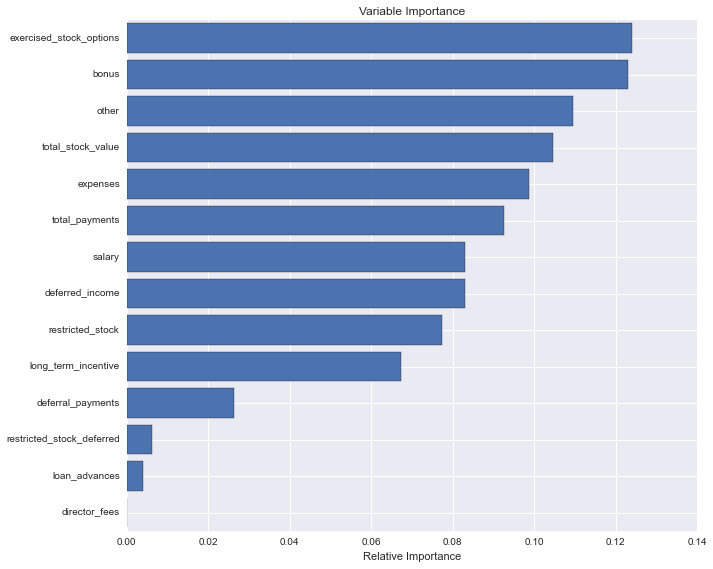

In [33]:
margin = np.arange(len(financial_cols)) + 0.5
plt.figure(figsize = (10,8))
plt.barh(margin, clf.feature_importances_[ordered_imp], align = 'center')
plt.yticks(margin, financial_cols[ordered_imp])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.tight_layout()

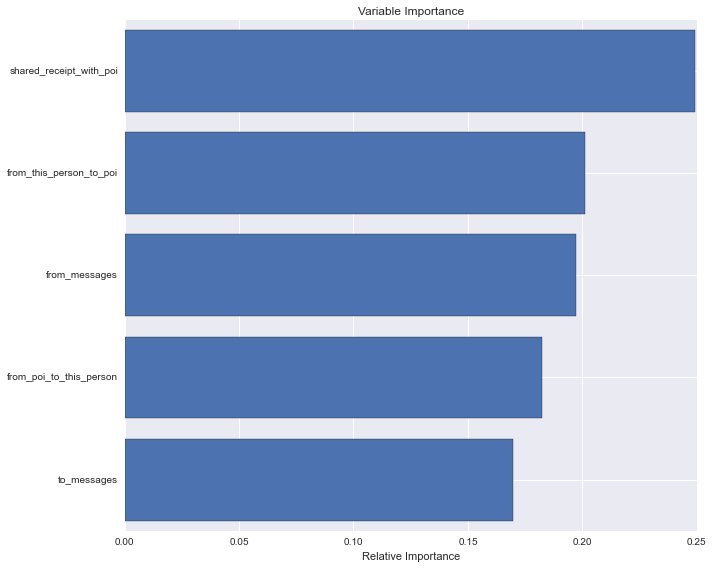

In [34]:
clf = RandomForestClassifier(n_estimators = 1000)
clf.fit(X[email_cols], y)
ordered_imp = np.argsort(clf.feature_importances_)

margin = np.arange(len(email_cols)) + 0.5
plt.figure(figsize = (10,8))
plt.barh(margin, clf.feature_importances_[ordered_imp], align = 'center')
plt.yticks(margin, email_cols[ordered_imp])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.tight_layout()

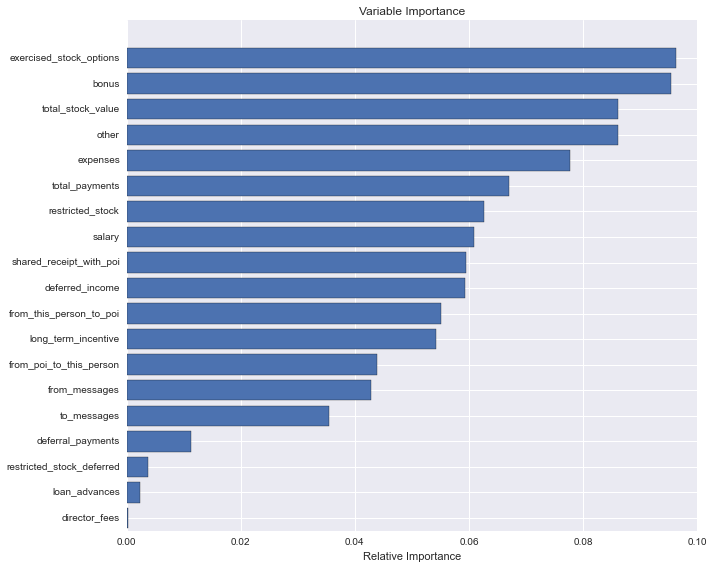

In [35]:
clf = RandomForestClassifier(n_estimators = 1000)
clf.fit(X[all_cols], y)
ordered_imp = np.argsort(clf.feature_importances_)

margin = np.arange(len(all_cols)) + 0.5 
plt.figure(figsize = (10,8))
plt.barh(margin, clf.feature_importances_[ordered_imp], align = 'center')
plt.yticks(margin, all_cols[ordered_imp])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.tight_layout()

Feature Transformation

In [36]:
enron[['exercised_stock_options','poi']].groupby('poi').median()

,exercised_stock_options
poi,
False,1043324.5
True,3914557.0


In [37]:
10463793.666667 / 2115891.772727

4.94533501266044

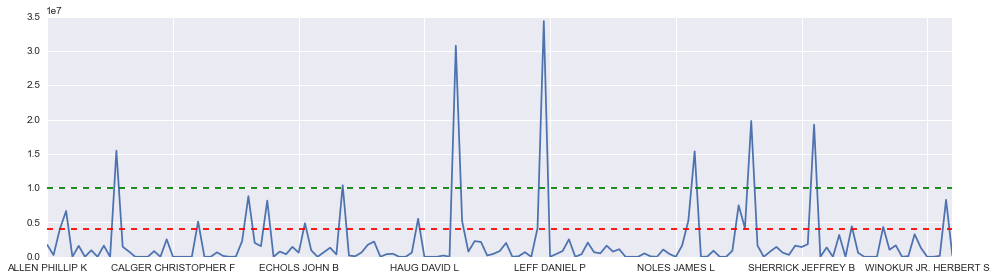

In [38]:
plt.figure(figsize = (14,4))
X.exercised_stock_options.plot()
plt.axhline(4000000, color = 'r', linestyle = '--')
plt.axhline(10000000, color = 'g', linestyle = '--')
plt.tight_layout()

In [39]:
bins = [0, 1000000, 2000000, 4000000, 6000000, 10000000, 40000000]
X['exercised_stock_options_bins'] = pd.cut(X.exercised_stock_options, bins, labels = False)
X.exercised_stock_options_bins.fillna(0, inplace = True)

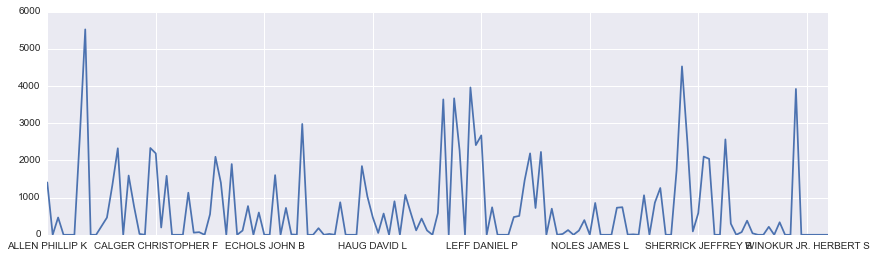

In [40]:
plt.figure(figsize = (14,4))
X.shared_receipt_with_poi.plot()

In [41]:
bins = [min(X.shared_receipt_with_poi)] + [250] + range(500, 5000, 500) + [max(X.shared_receipt_with_poi)]
X['shared_receipt_with_poi_bins'] = pd.cut(X.shared_receipt_with_poi, bins = bins, labels = False,
                                           include_lowest = True).astype(float)

In [43]:
# X.pop('shared_receipt_with_poi')
# X.pop('exercised_stock_options')
# X.drop(['shared_receipt_with_poi', 'exercised_stock_options'], axis = 1, inplace = True)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X['total_stock_scaled'] = scaler.fit_transform(X.total_stock_value)
X['bonus_scaled'] = scaler.fit_transform(X.bonus)

In [43]:
def negitiveLog(x):
    if x >= 0:
        return np.log1p(x)
    else:
        return 0
    
X['stock_log'] = X['total_stock_value'].apply(lambda x: negitiveLog(x))

In [44]:
payment_comp = ['salary', 'deferral_payments','bonus', 'expenses', 'loan_advances',
                'other', 'director_fees', 'deferred_income', 'long_term_incentive']

payment_total = ['total_payments']

stock_comp = ['exercised_stock_options', 'restricted_stock','restricted_stock_deferred']

stock_total = ['total_stock_value']

all_comp = payment_comp + stock_comp

email_comp = ['shared_receipt_with_poi', 'from_this_person_to_poi', 'from_poi_to_this_person']

email_totals = ['from_messages', 'to_messages']

In [45]:
X['total_compensation'] = X['total_payments'] + X['total_stock_value']

In [46]:
for col in payment_comp:
    X['{}_{}_ratio'.format(col, 'total_pay')] = X[col] / X['total_payments']

for each in stock_comp:
    X['{}_{}_ratio'.format(col, 'total_stock')] = X[col] / X['total_stock_value']

for col in all_comp:
    X['{}_{}_ratio'.format(col, 'total_compensation')] = X[col] / X['total_compensation']
    
X['total_poi_interaction'] = X['shared_receipt_with_poi'] + X['from_this_person_to_poi'] + X['from_poi_to_this_person']

for col in email_comp:
    X['{}_{}_ratio'.format(col, 'total_poi_int')] = X[col] / X['total_poi_interaction']

X['total_active_poi_interaction'] = X['from_this_person_to_poi'] + X['from_poi_to_this_person']
X['to_poi_total_active_poi_ratio'] = X['from_this_person_to_poi'] / X['total_active_poi_interaction']
X['from_poi_total_active_poi_ratio'] = X['from_poi_to_this_person'] / X['total_active_poi_interaction']

X['to_messages_to_poi_ratio'] = X['from_this_person_to_poi'] / X['to_messages']
X['from_messages_from_poi_ratio'] = X['from_poi_to_this_person'] / X['from_messages']
X['shared_poi_from_messages_ratio'] = X['shared_receipt_with_poi'] / X['from_messages']
X['shared_poi_total_compensation'] = X['shared_receipt_with_poi'] / X['total_compensation']
X['bonus_by_total_stock'] = X['bonus'] / X['total_stock_value']

for col in all_comp:
    X['{}_squared'.format(col)] = X[col]**2
    
for col in email_comp:
    X['{}_squared'.format(col)] = X[col]**2

In [47]:
X.fillna(0, inplace = True)
X.replace([np.inf, -np.inf], 0, inplace = True)

In [48]:
clf = RandomForestClassifier(n_estimators = 3000)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
ordered_imp = np.argsort(clf.feature_importances_)

scores = pd.DataFrame(zip(X.columns, clf.feature_importances_))
scores.columns = ['Feature', 'Importance']
scores.sort('Importance', ascending = False).reset_index(drop = True)

,Feature,Importance
0,exercised_stock_options_squared,3.474931e-02
1,exercised_stock_options,3.190075e-02
2,bonus,3.072602e-02
3,bonus_scaled,2.950055e-02
4,bonus_squared,2.675457e-02
5,total_stock_value,2.623159e-02
6,stock_log,2.542641e-02
7,other,2.534802e-02
8,other_squared,2.472132e-02
9,shared_poi_from_messages_ratio,2.315590e-02


### Predictions

My goal for predictions is not solely to obtain a high accuracy for my classifer, but I want to train a classifer that will be very good in finding the True POI's. So my model needs to have a good recall. As I am not as worried about how many people my classifer predicts as being potential POI's, but I need to find the real POI's.  So in summary, I am focusing on a good recall and not worry about the accuracy and precision of the model.

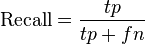

In [118]:
from IPython.display import Image
Image('https://upload.wikimedia.org/math/9/1/b/91b88600b433b3059101d0295735daf5.png')

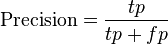

In [119]:
Image('https://upload.wikimedia.org/math/a/8/7/a87a5d89797001aa6c8d9a7031caf1ad.png')

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

clf = Pipeline(steps=[('minmaxer', MinMaxScaler(copy=True, feature_range=(0, 1))), 
                      ('reducer', PCA(copy=True, n_components=4, whiten=True)), 
                      ('classifier', LogisticRegression(C=10, class_weight='auto',
                                                        dual=False, fit_intercept=True,
                                                        intercept_scaling=1, penalty='l2',
                                                        random_state=None, tol=0.0001))])
clf.fit(X, y)

Pipeline(steps=[('minmaxer', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reducer', PCA(copy=True, n_components=4, whiten=True)), ('classifier', LogisticRegression(C=10, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0))])

In [51]:
clf.score(X, y)

0.71724137931034482

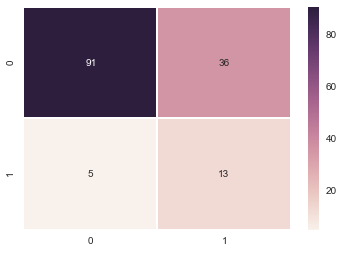

In [52]:
sns.heatmap(confusion_matrix(y, clf.predict(X)), annot = True, fmt = '')

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

cv = StratifiedShuffleSplit(y, n_iter = 100, test_size = 0.1, random_state = 100)

pipe = Pipeline([
        ('minMax', MinMaxScaler()),
        ('KBest', SelectKBest()),
        ('pca', PCA()),
        ('clf', LogisticRegression())
    ])

params = {
    'KBest__k' : np.arange(10,21,2),
    'clf__C' : np.array([1,10,100,1000]),
    'clf__class_weight' : [{True: 12, False: 1}, {True: 10, False: 1}, {True: 8, False: 1}],
    'clf__tol' : np.array([1e-1, 1e-2, 1e-4, 1e-8, 1e-16, 1e-32]),
    'pca__n_components' : np.arange(1,9),
    'pca__whiten' : [True, False],
}

gs_glm = GridSearchCV(pipe, params, cv = cv, scoring = 'f1')
#gs_glm.fit(X, y)

/Users/mattevanoff/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv=StratifiedShuffleSplit(labels=[False False ...,  True False], n_iter=100, test_size=0.1, random_state=100),
       error_score='raise',
       estimator=Pipeline(steps=[('minMax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('KBest', SelectKBest(k=10, score_func=<function f_classif at 0x10b6212a8>)), ('pca', PCA(copy=True, n_components=None, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'clf__C': array([   1,   10,  100, 1000]), 'pca__n_components': array([1, 2, 3, 4, 5, 6, 7, 8]), 'pca__whiten': [True, False], 'KBest__k': array([10, 12, 14, 16, 18, 20]), 'clf__tol': array([  1.00000e-01,   1.00000e-02,   1.00000e-04,   1.00000e-08,
         1.00000e-16,   1.00000e-32]), 'clf

In [81]:
gs_glm.best_estimator_, gs_glm.best_score_

(Pipeline(steps=[('minMax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('KBest', SelectKBest(k=10, score_func=<function f_classif at 0x10b6212a8>)), ('pca', PCA(copy=True, n_components=1, whiten=True)), ('clf', LogisticRegression(C=1, class_weight={False: 1, True: 10}, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', penalty='l2', random_state=None,
           solver='liblinear', tol=0.10000000000000001, verbose=0))]),
 0.43984992784992777)

Best classifer from Pipeline above

In [100]:
clf = Pipeline([
        ('minmaxer', MinMaxScaler(copy=True, feature_range=(0, 1))),
        ('selection', SelectKBest(k=20)),
        ('reducer', PCA(copy=True, n_components=1, whiten=True)), 
        ('classifier', LogisticRegression(C=1, class_weight={False: 1, True: 10}, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.1))])

In [104]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

clf.fit(X, y)
pred = clf.predict(X)

print clf.score(X, y)
print recall_score(y, pred)
print precision_score(y, pred)
print f1_score(y, pred)

0.737931034483
0.833333333333
0.3
0.441176470588


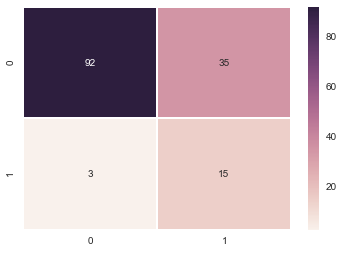

In [105]:
sns.heatmap(confusion_matrix(y, clf.predict(X)), annot = True, fmt = '')

In [106]:
enron[(enron.poi != pred) & (enron.poi == True)]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
KOPPER MICHAEL J,800000,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134,NaN,NaN,NaN,...,602671,907502,True,985032,NaN,224305,NaN,NaN,2652612,985032
SHELBY REX,200000,NaN,-4167,NaN,rex.shelby@enron.com,1624396,22884,39,13,14,...,NaN,1573324,True,869220,NaN,211844,91,225,2003885,2493616
YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552,53947,NaN,NaN,NaN,...,NaN,147950,True,3576206,NaN,158403,NaN,NaN,360300,11884758


In [107]:
clf = Pipeline([
        ('minmaxer', MinMaxScaler(copy=True, feature_range=(0, 1))),
        ('reducer', PCA(copy=True, n_components=5, whiten=True)),
        ('classifier', LogisticRegression(C=0.01, class_weight='auto', dual=False, fit_intercept=True, intercept_scaling=1, penalty='l2', random_state=None, tol=0.01))])


clf.fit(X, y)
print clf.score(X, y)

print recall_score(y, clf.predict(X))
print precision_score(y, clf.predict(X))

0.696551724138
0.888888888889
0.275862068966


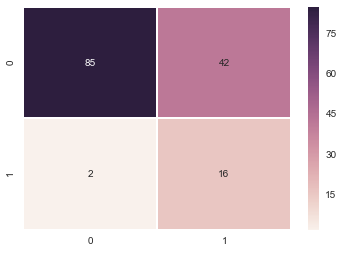

In [108]:
sns.heatmap(confusion_matrix(y, clf.predict(X)), annot = True, fmt = '')

In [109]:
enron[(enron.poi != pred) & (enron.poi == True)]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
KOPPER MICHAEL J,800000,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134,NaN,NaN,NaN,...,602671,907502,True,985032,NaN,224305,NaN,NaN,2652612,985032
SHELBY REX,200000,NaN,-4167,NaN,rex.shelby@enron.com,1624396,22884,39,13,14,...,NaN,1573324,True,869220,NaN,211844,91,225,2003885,2493616
YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552,53947,NaN,NaN,NaN,...,NaN,147950,True,3576206,NaN,158403,NaN,NaN,360300,11884758


In [110]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC

clf = Pipeline([('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
          ('low_var_remover', VarianceThreshold(threshold=0.1)),
          ('classifier', LinearSVC(C=0.1, class_weight='auto', dual=False, fit_intercept=True, 
                                   intercept_scaling=1, loss='squared_hinge', multi_class='ovr', penalty='l1', 
                                   random_state=None, tol=1e-07, verbose=0))])
clf.fit(X, y)
pred = clf.predict(X)

print clf.score(X, y)
print recall_score(y, pred)
print precision_score(y, pred)
print f1_score(y, pred)

0.758620689655
0.888888888889
0.326530612245
0.477611940299


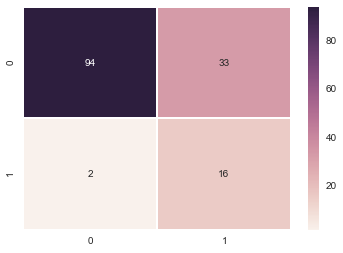

In [111]:
sns.heatmap(confusion_matrix(y, pred), annot = True, fmt = '')

In [112]:
enron[(enron.poi != pred) & (enron.poi == True)]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
RIEKER PAULA H,700000,214678,-100000,NaN,paula.rieker@enron.com,1635238,33271,82,35,48,...,NaN,1950,True,283649,NaN,249201,1258,1328,1099100,1918887
YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552,53947,NaN,NaN,NaN,...,NaN,147950,True,3576206,NaN,158403,NaN,NaN,360300,11884758


In [80]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

clf = Pipeline([('minmaxer', MinMaxScaler(copy=True, feature_range=(0, 1))),
          ('reducer', PCA(copy=True, n_components=5, whiten=False)),
          ('classifier2', SGDClassifier(alpha=0.0001, class_weight='auto', epsilon=0.1, eta0=0.0, fit_intercept=True, 
                                        l1_ratio=0.15, learning_rate='optimal', loss='hinge', n_iter=300, n_jobs=1, 
                                        penalty='elasticnet', power_t=0.5, random_state=None, shuffle=False, 
                                        verbose=0, warm_start=False))]) 

clf.fit(X, y)
print clf.score(X, y)

pred = clf.predict(X)

print recall_score(y, pred)
print precision_score(y, pred)
print f1_score(y, pred)

0.744827586207
0.888888888889
0.313725490196
0.463768115942


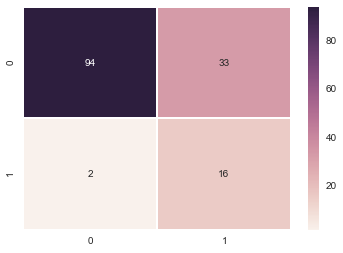

In [95]:
sns.heatmap(confusion_matrix(y, pred), annot = True, fmt = '')

And the 2 persons of intrest that the classifer didn't seem to find are...

In [91]:
enron[(enron.poi != pred) & (enron.poi == True)]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
RIEKER PAULA H,700000,214678,-100000,NaN,paula.rieker@enron.com,1635238,33271,82,35,48,...,NaN,1950,True,283649,NaN,249201,1258,1328,1099100,1918887
SHELBY REX,200000,NaN,-4167,NaN,rex.shelby@enron.com,1624396,22884,39,13,14,...,NaN,1573324,True,869220,NaN,211844,91,225,2003885,2493616


So this is just a start but my final model achieved a 0.89 recall score and only misclassifed 2 POI's